In [2]:
import math

import pandas as pd
from nltk.stem import PorterStemmer
from nltk import word_tokenize

from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

import utils

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
stemmer = PorterStemmer()

In [4]:
tdf_g = pd.read_csv('speaker_grouped_trimmed.csv', index_col=0)

In [5]:
tdf_g

,date,speaker,text_enhanced
1696,1994-02-04,CHAIRMAN GREENSPAN.,"As you know, this is our organizational meetin..."
1697,1994-02-04,MR. BERNARD.,"Secretary and Economist, Donald Kohn; Deputy S..."
1698,1994-02-04,MR. BOEHNE.,"Normally in an economic expansion, development..."
1699,1994-02-04,MR. BROADDUS.,My report is going to be pretty bland after th...
1700,1994-02-04,MR. COYNE.,"Oh, believe me, you will get asked! I think i..."
...,...,...,...
6827,2017-12-13,MS. BRAINARD.,I don't think of this as a normative statement...
6828,2017-12-13,MS. GEORGE.,"Lorie, on exhibit 2, chart 12, would you expla..."
6829,2017-12-13,MS. LOGAN.,Thank you. I will begin on your second exhibi...
6830,2017-12-13,MS. MESTER.,"Thank you, Madam Chair. Reports received from..."


In [6]:
tdf_g['tokens'] = tdf_g['text_enhanced'].apply(lambda x : utils.process(x, stemmer=stemmer)) 

In [7]:
texts = tdf_g['tokens'].tolist()

In [8]:
dictionary = Dictionary().load('12-10dict')

In [9]:
len(dictionary)

10957

In [10]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [11]:
K = 45

In [12]:
ldamodel = LdaModel(corpus, num_topics=K, id2word=dictionary, passes=10, random_state=0, minimum_probability=0, eta=0.025, alpha=50/K)

In [ ]:
ldamodel.save('12-10lda')

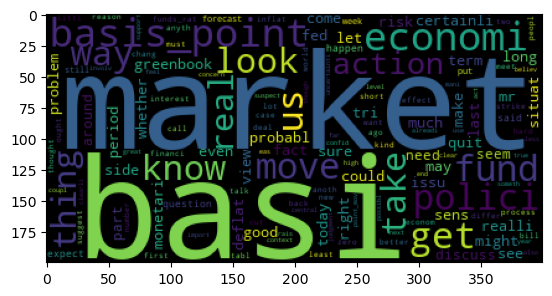

In [39]:
plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(3, 200))))

In [13]:
ldamodel.print_topics(num_topics=45, num_words=10)

[(0,
  '0.036*"tax" + 0.027*"fiscal" + 0.015*"year" + 0.010*"polici" + 0.010*"percent" + 0.009*"move" + 0.008*"congress" + 0.008*"govern" + 0.007*"get" + 0.007*"cut"'),
 (1,
  '0.026*"hous" + 0.020*"home" + 0.010*"price" + 0.010*"new" + 0.010*"area" + 0.008*"continu" + 0.008*"construct" + 0.007*"mr" + 0.007*"also" + 0.006*"increas"'),
 (2,
  '0.019*"inflat" + 0.017*"chair" + 0.017*"year" + 0.017*"percent" + 0.016*"labor" + 0.012*"growth" + 0.011*"market" + 0.011*"expect" + 0.010*"continu" + 0.010*"unemploy"'),
 (3,
  '0.014*"basi" + 0.013*"market" + 0.010*"basis_point" + 0.010*"economi" + 0.009*"get" + 0.008*"move" + 0.008*"fund" + 0.008*"us" + 0.008*"polici" + 0.007*"know"'),
 (4,
  '0.012*"want" + 0.011*"thing" + 0.011*"peopl" + 0.010*"question" + 0.008*"make" + 0.008*"tri" + 0.008*"way" + 0.007*"us" + 0.007*"issu" + 0.007*"talk"'),
 (5,
  '0.022*"u" + 0.021*"dollar" + 0.017*"foreign" + 0.015*"growth" + 0.014*"economi" + 0.012*"global" + 0.011*"export" + 0.011*"countri" + 0.009*"chin

In [17]:
def get_all_topics(tokens):
    topic_probs = ldamodel[dictionary.doc2bow(tokens)]
    result = [0] * 45
    for topic, prob in topic_probs:
        result[topic] = prob
    return pd.Series(result)

In [18]:
tdf_g[[f'tprob_{i}' for i in range(45)]] = tdf_g.tokens.apply(get_all_topics)

In [ ]:
tdf_g

In [ ]:
tdf_g['tokens']

EVENTUALLY FIX THIS TO ONLY INCLUDE WORDS NOT PRUNED BY TF-IDF

In [19]:
tdf_g['len'] = tdf_g['tokens'].apply(len)

In [20]:
tdf_g.to_csv('grouped_w_topics.csv')